In [1]:
# 영상처리와 수치연산을 위한 라이브러리를 불러옵니다.
import numpy as np
import cv2
from matplotlib import pyplot as plt

Saving lenna.bmp to lenna (1).bmp


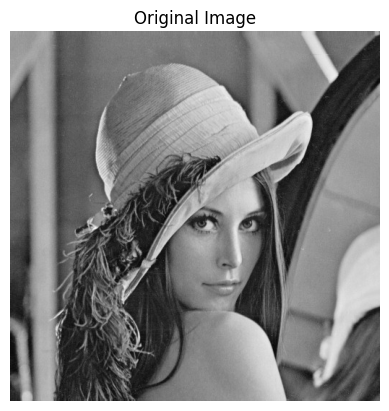

In [3]:
# Colab에서는 로컬 이미지를 직접 불러오기 위해 아래 코드를 사용합니다.
from google.colab import files
uploaded = files.upload()

# 파일명을 입력하세요. 예: 'lenna.bmp'
img_filename = list(uploaded.keys())[0]

# 이미지를 그레이스케일로 읽어옵니다.
src = cv2.imread(img_filename, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
else:
    plt.imshow(src, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

In [4]:
# 명암비(contrast)를 조절하는 코드입니다.
alpha = 1.0 # 기울기(명암비) 계수, 1은 변화 없음

# 명암비 조절 공식 적용
dst = np.clip((1 + alpha) * src - 128 * alpha, 0, 255).astype(np.uint8)

$\alpha$는 명암비를 조절하는 계수입니다.

$(1 + \alpha) * src - 128 * \alpha$ 공식으로 명암비를 조정합니다.

np.clip으로 값이 0~255 범위를 벗어나지 않게 하고, astype(np.uint8)로 타입을 맞춥니다.

**명암비(contrast)**는 이미지의 밝고 어두운 정도의 차이를 의미합니다.
명암비를 높이면 밝은 부분은 더 밝게, 어두운 부분은 더 어둡게 됩니다.

(1 + α) × src :

각 픽셀의 값을 (1 + α)배로 늘립니다.
α > 0 이면 → 픽셀 값 변화폭이 커져서 명암비가 증가합니다.
α = 0 이면 → 원본과 동일 (변화 없음)

$- 128 × α$ :

모든 픽셀 값에서 128만큼을 한 번에 빼줍니다.

왜 128일까요?

128은 그레이스케일 이미지의 중간 밝기(0~255의 중간값)입니다.
픽셀 값 확대(명암비 증가)로 인해 이미지가 밝아지는 현상을 막기 위해, 중간값 기준으로 이동하여 이미지의 전체 밝기 평균을 유지하게끔 보정합니다.


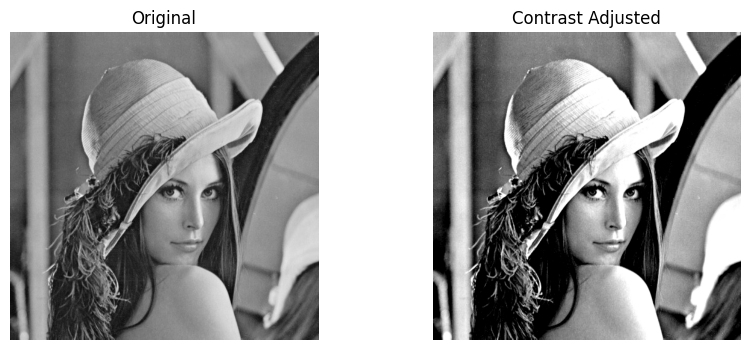

In [5]:
# 원본과 명암비 조절 이미지를 나란히 비교해서 출력합니다.
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(src, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title('Contrast Adjusted')
plt.axis('off')

plt.show()

원본 이미지와 명암비가 조절된 이미지를 나란히 보여줍니다.
이렇게 하면 조절된 결과를 직관적으로 확인할 수 있습니다.

명암비 증가: α > 0이면, 중간값(128) 기준으로 밝은 픽셀은 더 밝게, 어두운 픽셀은 더 어둡게 만듭니다.

중간값 유지:
−128
로 인해 전체 밝기 평균이 변하지 않습니다.